In [0]:
# call in all the dependencies
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# we care only of the images no need of the labels
(x_train , _) , (x_test , _) = mnist.load_data()

# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0
# creating data into a single vector of 784 length
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [0]:
# so we have our data ready for training 
# lets make our model Autoencoder

encoder_dim = 32 # so we have a compression ratio of 24.5 i.e. 784/32

# input layer for our model
input_img = Input(shape = (784,))

# layers for our model which are stacked together
encoded = Dense(encoder_dim ,activation = 'relu')(input_img)
decoded = Dense(784 , activation = 'sigmoid')(encoded)

# this is our model calling in decoded layer
autoencoder = Model(input_img , decoded)

In [0]:
# lets train our model
autoencoder.compile(loss = "binary_crossentropy" , optimizer = "adadelta")

In [0]:
autoencoder.fit(x_train , x_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test , x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.3545 - val_loss: 0.2707
Epoch 2/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2629 - val_loss: 0.2517
Epoch 3/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2418 - val_loss: 0.2296
Epoch 4/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.2221 - val_loss: 0.2129
Epoch 5/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.2082 - val_loss: 0.2011
Epoch 6/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.1979 - val_loss: 0.1919
Epoch 7/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.1895 - val_loss: 0.1844
Epoch 8/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1826 - val_loss: 0.1781
Epoch 9/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.1766 - val_loss: 0.1725
Epoch

In [0]:
# these are seperate models to help us seperate the model autoencoder into its 2 parts and visualize the results
encoder = Model(input_img , encoded)
encoded_input = Input(shape = (encoder_dim,)) # like input_img
decoder_layer = autoencoder.layers[-1] # the layer right before the model spits result vector
decoder = Model(encoded_input , decoder_layer(encoded_input))

In [0]:
# encoded_imgs are the images compressed
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

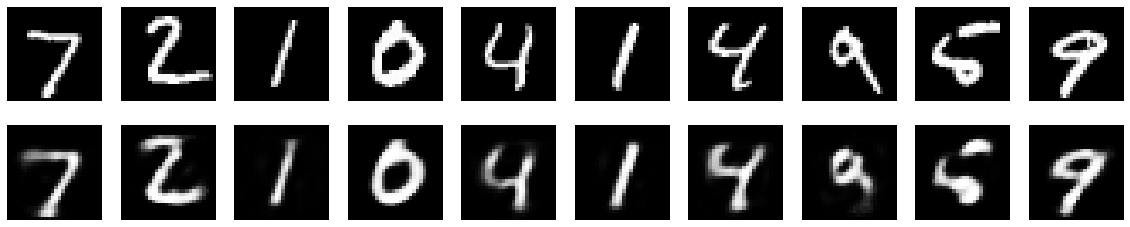

In [0]:
# we will now visualse the results and their accuracy
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
change = encoded_imgs.mean() 
print(change)

7.035976


In [0]:
## check out the sparse autoencoder for the change we meant by the sparse autoencoder...